### Libraries import and simple setup

In [2]:
library(openxlsx)
library(ggplot2)
library(dplyr)
library(RColorBrewer)
library(cowplot)
library(latex2exp)

In [3]:
theme_set(theme_bw()) # theme setup

### 1. Importing and adjusting energy data

In [4]:
df.energy <- read.xlsx("../data/Energy.xlsx",sheet='R_prepared_long')

temp.levels <- c("37°C (AD)", "45°C", "50°C", "55°C", "60°C", "45°C (HEX)", "50°C (HEX)", "55°C (HEX)", "60°C (HEX)")
df.energy$Temp <- factor(df.energy$Temp,ordered = TRUE, levels = temp.levels)
df.energy$type <- factor(df.energy$type,ordered=TRUE,levels=rev(c("total energy", "electricity", "heat","Net total LT-PT+AD - net AD")))

head(df.energy)

,data,Temp,value,type.full,type,comment
,<chr>,<ord>,<dbl>,<chr>,<ord>,<chr>
1,fig7a,45°C,-0.4899856,Net heat,heat,Without heat recovery in LT-PT
2,fig7a,50°C,-1.3483991,Net heat,heat,Without heat recovery in LT-PT
3,fig7a,55°C,-1.9513926,Net heat,heat,Without heat recovery in LT-PT
4,fig7a,60°C,-1.8257461,Net heat,heat,Without heat recovery in LT-PT
5,fig7a,45°C (HEX),0.2047676,Net heat,heat,With heat recovery in LT-PT
6,fig7a,50°C (HEX),-0.2194252,Net heat,heat,With heat recovery in LT-PT


### 2. Plot 1

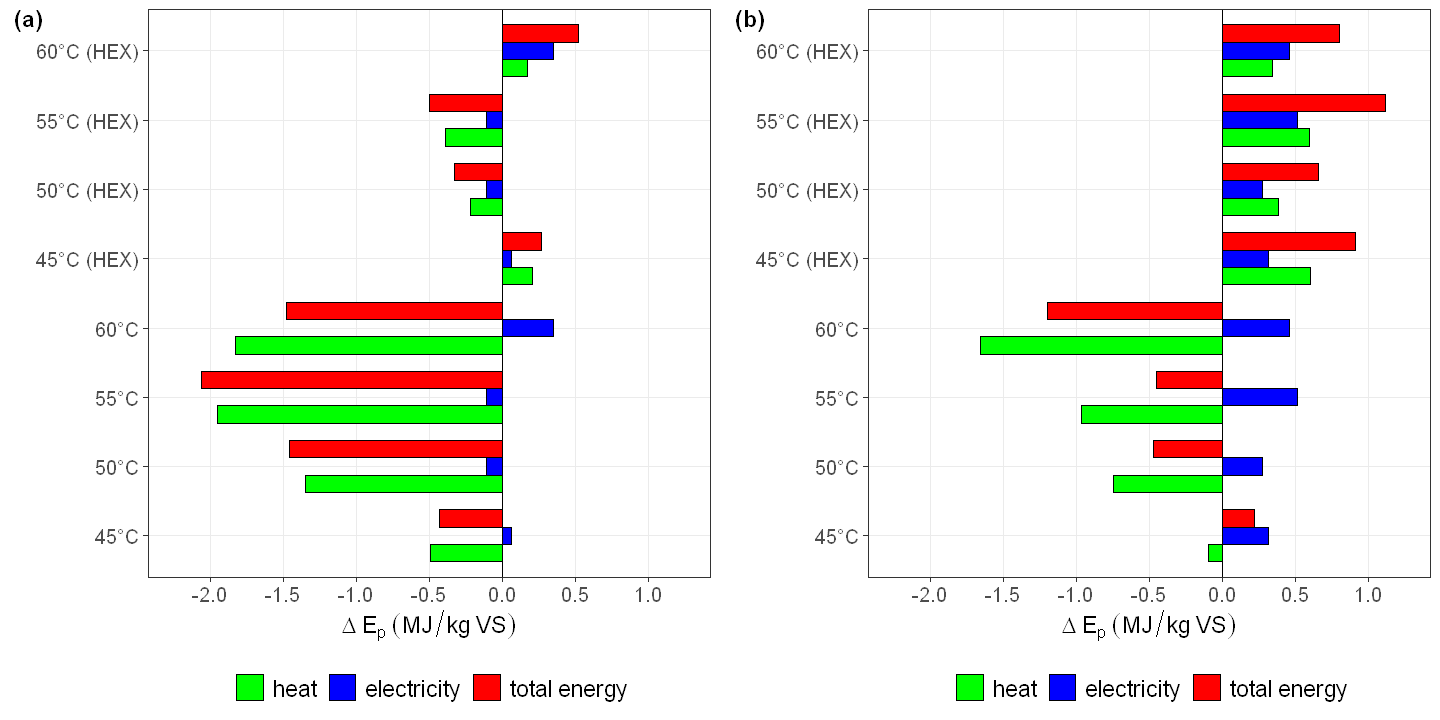

In [5]:
plot1a <- ggplot(df.energy[df.energy$data=="fig7a",],aes(x=value,y=Temp,fill=type)) + 
          geom_bar(stat="identity",position=position_dodge(),width = 0.75,color="black") + geom_vline(xintercept = 0,linewidth=0.5) +
          scale_fill_manual(values = c('total energy'="red", 'electricity'="blue", 'heat'="green","Net total LT-PT+AD - net AD"="chocolate1")) +
          scale_x_continuous(TeX("\\Delta E$_{p} $ $(MJ/kg $ VS$)"), seq(-2.5,1.5,0.5), seq(-2.5,1.5,0.5),limits=c(-2.25,1.25)) + 
          ylab("") +
          theme(legend.position="bottom",
                axis.text= element_text(size=12),
                axis.title=element_text(size=14,face="bold"),
                legend.text=element_text(size=14)) +
          guides(fill=guide_legend(title=""))

plot1b <- ggplot(df.energy[df.energy$data=="fig7b",],aes(x=value,y=Temp,fill=type)) + 
          geom_bar(stat="identity",position=position_dodge(),width = 0.75,color="black") + geom_vline(xintercept = 0,linewidth=0.5) +
          scale_fill_manual(values = c('total energy'="red", 'electricity'="blue", 'heat'="green","Net total LT-PT+AD - net AD"="chocolate1")) +
          scale_x_continuous(TeX("\\Delta E$_{p} $ $(MJ/kg $ VS$)"), seq(-2.5,1.5,0.5), seq(-2.5,1.5,0.5),limits=c(-2.25,1.25)) +  
          ylab("") +xlab(TeX("\\Delta E$_{p} $ $(MJ/kg $ VS$)")) +
          theme(legend.position="bottom",
                axis.text= element_text(size=12),
                axis.title=element_text(size=14,face="bold"),
                legend.text=element_text(size=14)) +
          guides(fill=guide_legend(title=""))

options(repr.plot.width=12, repr.plot.height=6)
pg <- plot_grid(plot1a, plot1b,
                nrow=1,ncol=2,labels=c('(a)','(b)', label_size = 14))
pg

### Plot 2

Warning message:
"Removed 1 rows containing missing values (`geom_bar()`)."


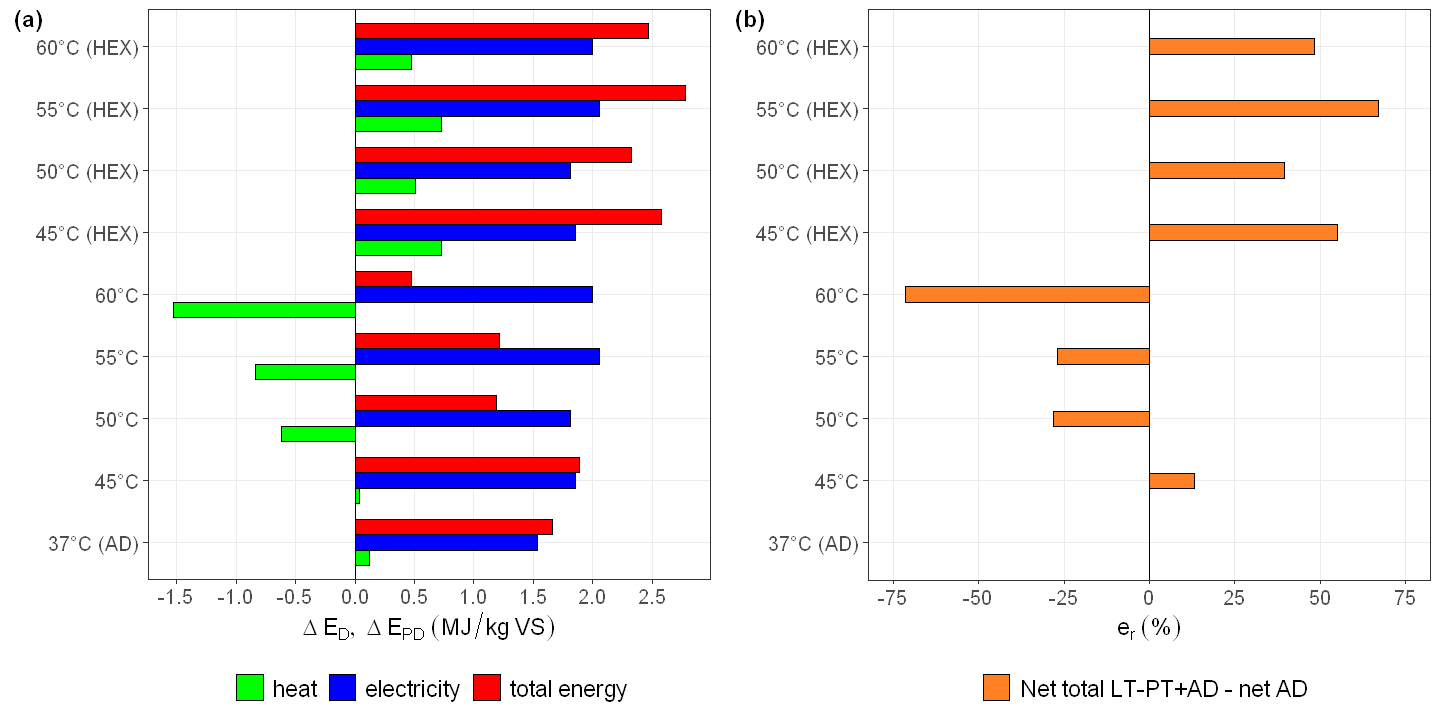

In [6]:
plot2a <- ggplot(df.energy[df.energy$data=="fig8a",],aes(x=value,y=Temp,fill=type)) + 
          geom_bar(stat="identity",position=position_dodge(),width = 0.75,color="black") + geom_vline(xintercept = 0,linewidth=0.5) +
          scale_fill_manual(values = c('total energy'="red", 'electricity'="blue", 'heat'="green","Net total LT-PT+AD - net AD"="chocolate1")) +
          scale_x_continuous(TeX("\\Delta E$_{D},$ \\Delta E$_{PD} $ $(MJ/kg $ VS$)"), seq(-2,3.0,0.5), seq(-2,3.0,0.5),) +  
          ylab("") +
          theme(legend.position="bottom",
                axis.text= element_text(size=12),
                axis.title=element_text(size=14,face="bold"),
                legend.text=element_text(size=14)) +
          guides(fill=guide_legend(title=""))

plot2b <- ggplot(df.energy[df.energy$data=="fig8b",],aes(x=value*100,y=Temp,fill=type)) + 
          geom_bar(stat="identity",position=position_dodge(),width = 0.25,color="black") + geom_vline(xintercept = 0,linewidth=0.5) +
          scale_fill_manual(values = c('total energy'="red", 'electricity'="blue", 'heat'="green","Net total LT-PT+AD - net AD"="chocolate1")) +
          scale_x_continuous(TeX("e$_r $ $($%$)"), seq(-100,100,25), seq(-100,100,25),limits=c(-75,75)) +  
          ylab("") +
          theme(legend.position="bottom",
                axis.text= element_text(size=12),
                axis.title=element_text(size=14,face="bold"),
                legend.text=element_text(size=14)) +
          guides(fill=guide_legend(title=""))

options(repr.plot.width=12, repr.plot.height=6)
pg <- plot_grid(plot2a, plot2b,
                nrow=1,ncol=2,labels=c('(a)','(b)', label_size = 14))
pg